In [1]:
from sklearn import metrics
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("/home/mani/Courses/Advertising/Advertising.csv")

In [8]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data_filter = data.drop(['Unnamed: 0'],axis=1)

In [7]:
data_filter.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Printing Scatter Plots

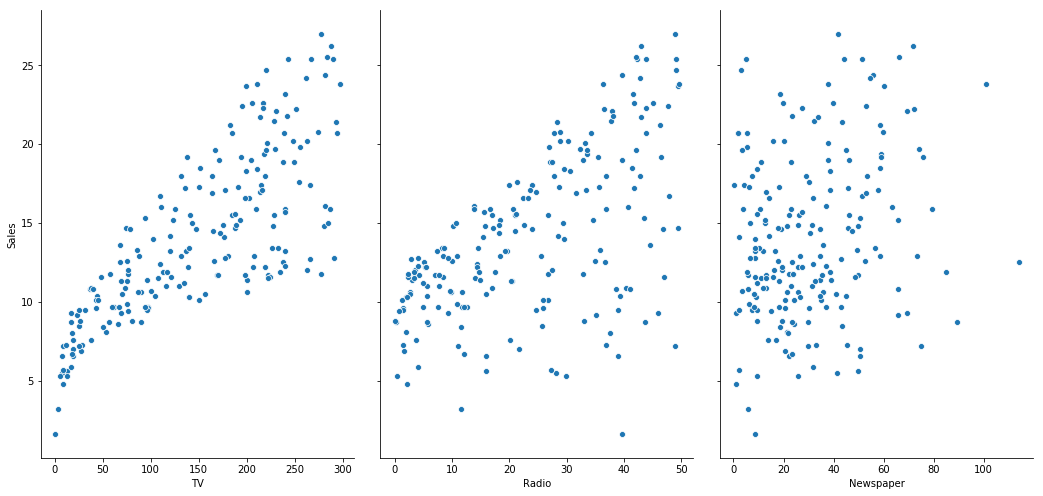

In [23]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)

# Plotting The Least Squared Lines

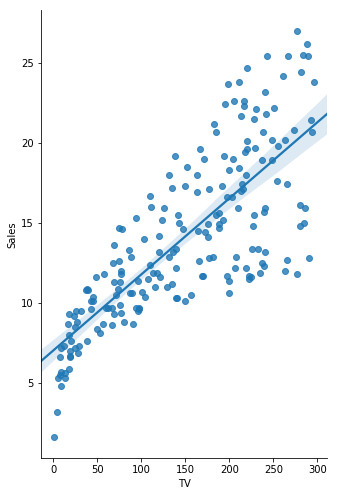

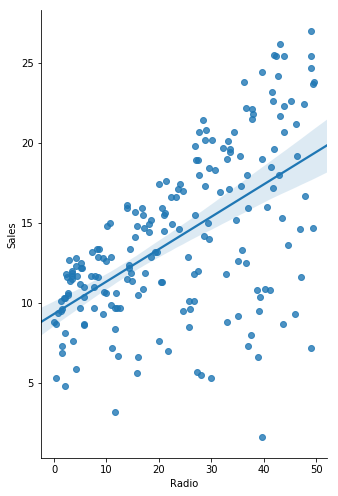

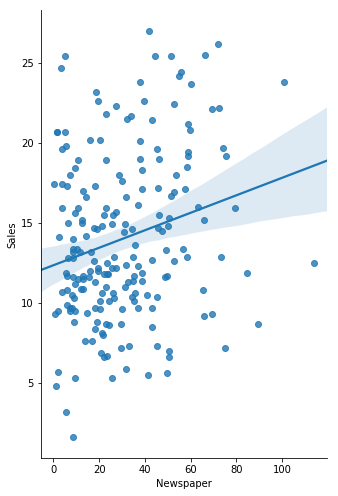

In [24]:
sns.pairplot(data, x_vars=['TV'], y_vars='Sales', height=7, aspect=0.7, kind='reg')
sns.pairplot(data, x_vars=['Radio'], y_vars='Sales', height=7, aspect=0.7, kind='reg')
sns.pairplot(data, x_vars=['Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

In [13]:
y = data['Sales']

# Statistical Tests

In [22]:
# Regression On TV
tv=data[['TV']]
sales = sm.OLS(y, tv).fit()
sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1733.
Date:                Thu, 07 Feb 2019   Prob (F-statistic):          3.52e-100
Time:                        11:29:39   Log-Likelihood:                -597.51
No. Observations:                 200   AIC:                             1197.
Df Residuals:                     199   BIC:                             1200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Regression On Radio
radio=data[['Radio']]
sales = sm.OLS(y, radio).fit()
sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     834.0
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           4.27e-73
Time:                        11:32:54   Log-Likelihood:                -660.13
No. Observations:                 200   AIC:                             1322.
Df Residuals:                     199   BIC:                             1326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Radio          0.4873      0.017     28.879      0.000       0.454       0.521
==============================================================================
Omnibus:                       29.193   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.013
Skew:                          -1.014   Prob(JB):                     9.18e-09
Kurtosis:                       3.577   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Regression On Newspaper
news=data[['Newspaper']]
sales = sm.OLS(y, news).fit()
sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     379.9
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           4.98e-48
Time:                        11:34:18   Log-Likelihood:                -718.04
No. Observations:                 200   AIC:                             1438.
Df Residuals:                     199   BIC:                             1441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Newspaper      0.3232      0.017     19.492      0.000       0.291       0.356
==============================================================================
Omnibus:                       10.866   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.018
Skew:                          -0.418   Prob(JB):                      0.00149
Kurtosis:                       3.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# TV and NewsPaper
x=data[['TV','Newspaper']]
sales = sm.OLS(y, x).fit()
sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1332.
Date:                Thu, 07 Feb 2019   Prob (F-statistic):          1.44e-115
Time:                        11:20:15   Log-Likelihood:                -557.72
No. Observations:                 200   AIC:                             1119.
Df Residuals:                     198   BIC:                             1126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0664      0.002     28.032      0.000       0.062       0.071
Newspaper      0.1058      0.011      9.836      0.000       0.085       0.127
==============================================================================
Omnibus:                       16.291   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.802
Skew:                          -0.678   Prob(JB):                     0.000136
Kurtosis:                       3.546   Cond. No.                         6.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Radio Newspaper
x=data[['Radio','Newspaper']]
sales = sm.OLS(y, x).fit()
sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     487.9
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           3.02e-77
Time:                        11:22:35   Log-Likelihood:                -646.85
No. Observations:                 200   AIC:                             1298.
Df Residuals:                     198   BIC:                             1304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Radio          0.3763      0.026     14.334      0.000       0.325       0.428
Newspaper      0.1024      0.019      5.303      0.000       0.064       0.140
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.382
Skew:                          -1.137   Prob(JB):                     2.56e-12
Kurtosis:                       4.110   Cond. No.                         3.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# TV Radio
x=data[['TV','Radio']]
sales = sm.OLS(y, x).fit()
sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5206.
Date:                Thu, 07 Feb 2019   Prob (F-statistic):          6.73e-172
Time:                        11:25:38   Log-Likelihood:                -426.71
No. Observations:                 200   AIC:                             857.4
Df Residuals:                     198   BIC:                             864.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0548      0.001     42.962      0.000       0.052       0.057
Radio          0.2356      0.008     29.909      0.000       0.220       0.251
==============================================================================
Omnibus:                        6.047   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                8.829
Skew:                          -0.112   Prob(JB):                       0.0121
Kurtosis:                       4.005   Cond. No.                         9.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Multiple Regression On Three Variables
X=data[['TV','Radio','Newspaper']]
sales = sm.OLS(y, x).fit()
sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5206.
Date:                Thu, 07 Feb 2019   Prob (F-statistic):          6.73e-172
Time:                        11:27:41   Log-Likelihood:                -426.71
No. Observations:                 200   AIC:                             857.4
Df Residuals:                     198   BIC:                             864.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0548      0.001     42.962      0.000       0.052       0.057
Radio          0.2356      0.008     29.909      0.000       0.220       0.251
==============================================================================
Omnibus:                        6.047   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                8.829
Skew:                          -0.112   Prob(JB):                       0.0121
Kurtosis:                       4.005   Cond. No.                         9.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Evaluation Using Train Test Split

In [27]:
# Model Including Newspaper
X=data_filter[['TV','Radio','Newspaper']]
y=data_filter['Sales']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)
y_pred = regression_model.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.697063266379363


In [31]:
# Model Excluding Newspaper
X=data_filter[['TV','Radio']]
y=data_filter['Sales']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)
y_pred = regression_model.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.6893770318599999
